

# Project: TMDB Movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen the movies dataset to work with for this project. We will first get to know the different properties this dataset has, then bridge any gaps it possess by wrangling the dataset. After cleaning the dataset we will explore its characteristics and try to use visualizations to answer the questions this dataset raises.
The main questions we will try to investigate in this dataset is :
1. What production company had the most success based on these 10,000 movies?
2. How did movie genres change over time?


In [1]:
# importing the needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

in the following cells, we will explore the characterastics of our dataset using different pandas functions. 
Each function is described in the comment above it

In [2]:
dfm = pd.read_csv('tmdb-movies.csv')
dfm.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Identifying the data types of our columns
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# getting to know the descriptive statistics of out columns
dfm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# now for the number of columns rows for our data
dfm.shape

(10866, 21)

In [6]:
# counting the number of null values
dfm.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# number of duplicated rows
dfm.duplicated().sum()

1

In [8]:
# showing duplicated rows
dfm[dfm.duplicated(keep= False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0




### Data Cleaning 

First we will eliminate columns that will not be needed in the analysis

In [9]:

dfm.drop(['imdb_id','homepage','tagline','keywords','overview'],axis = 1, inplace = True)

since the columns genres and production company are important in answering my questions,
I will drop movies that have null values in these two categories

In [10]:
dfm.dropna(axis = 0, subset=['genres'],inplace = True)
dfm.dropna(axis = 0, subset=['production_companies'],inplace = True)
dfm.shape

(9827, 16)

Now to drop the duplicated values then checking new number of columns and rows

In [11]:
dfm.drop_duplicates(inplace = True)

In [12]:
dfm.shape

(9826, 16)

Dividing budget and revenue by 1000 to make values more presentable, then rounding adjusted revenue and budget to 3 decimals for the same purposes

In [13]:
dfm['revenue'] = dfm['revenue'].apply(lambda x: x/1000)
dfm['revenue_adj'] = dfm['revenue_adj'].apply(lambda x: x/1000)
dfm['budget'] = dfm['budget'].apply(lambda x: x/1000)
dfm['budget_adj'] = dfm['budget_adj'].apply(lambda x: x/1000) 

In [14]:
dfm['revenue_adj'] = dfm['revenue_adj'].round(3)
dfm['budget_adj'] = dfm['budget_adj'].round(3)

As profit is an important measure for the success of each movie, we add a column that calculates movies profits using the adjusted revenue and adjusted budget coulmns

In [15]:
# adding a column that calculates movies profits
dfm['profit_adj'] = dfm['revenue_adj'] - dfm['budget_adj']
dfm.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000.0,1513528.810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999.939,1392445.893,1254445.954
1,76341,28.419936,150000.0,378436.354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999.939,348161.292,210161.353
2,262500,13.112507,110000.0,295238.201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199.955,271619.025,170419.070
3,140607,11.173104,200000.0,2068178.225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999.919,1902723.130,1718723.211
4,168259,9.335014,190000.0,1506249.360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799.923,1385748.801,1210948.878


As we are intrested in the success of production companies and the change of genres overtime, we will create a new coulmn that 
takes the values of lead production company (the first one) and the main genre and puts it in new columns that will be used for plotting the data

In [16]:
# creating new columns for main genre and lead production company
dfm['main_genre'] = dfm['genres'].str.split("|").str[0]
dfm['lead_production_company'] = dfm['production_companies'].str.split("|").str[0]
dfm.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,main_genre,lead_production_company
0,135397,32.985763,150000.0,1513528.810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999.939,1392445.893,1254445.954,Action,Universal Studios
1,76341,28.419936,150000.0,378436.354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999.939,348161.292,210161.353,Action,Village Roadshow Pictures
2,262500,13.112507,110000.0,295238.201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199.955,271619.025,170419.070,Adventure,Summit Entertainment
3,140607,11.173104,200000.0,2068178.225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999.919,1902723.130,1718723.211,Action,Lucasfilm
4,168259,9.335014,190000.0,1506249.360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799.923,1385748.801,1210948.878,Action,Universal Pictures


Changing the datatype for out release date column from string to datetime, then one final look at the dataset before exoplring.

In [17]:
# converting data type for the dates
dfm['release_date'] = pd.to_datetime(dfm['release_date'])

In [18]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 19 columns):
id                         9826 non-null int64
popularity                 9826 non-null float64
budget                     9826 non-null float64
revenue                    9826 non-null float64
original_title             9826 non-null object
cast                       9791 non-null object
director                   9806 non-null object
runtime                    9826 non-null int64
genres                     9826 non-null object
production_companies       9826 non-null object
release_date               9826 non-null datetime64[ns]
vote_count                 9826 non-null int64
vote_average               9826 non-null float64
release_year               9826 non-null int64
budget_adj                 9826 non-null float64
revenue_adj                9826 non-null float64
profit_adj                 9826 non-null float64
main_genre                 9826 non-null object
lead_production_c

# We're good to go!

<a id='eda'></a>
## Exploratory Data Analysis

in this section I will try to answer three questions that was asked in the begining with descriptive statistics ans visualizations

### What production company had the most success based on these 10,000 movies?

To answer this question, I use two variables to measue success. the first is a column I created which is adjusted profit which I beielve that it measures monetary success better than revenue.
The second variable is vote average which measurs user's rating regardless of the movie monetary success.

First lets set the float format to show all decimals, this will help in tracking data progress as most values are shown in e+0n form right now

In [19]:
pd.set_option('float_format', '{:f}'.format)

Using groupby lead production company then summing on profit. then finally using n.largest to select only the five highest companies in terms of profit

In [20]:
a= dfm.groupby('lead_production_company')['profit_adj'].sum()
pc_profits= a.nlargest(5)
pc_profits


lead_production_company
Universal Pictures                       38969051.383000
Paramount Pictures                       37433271.774000
Walt Disney Pictures                     25638595.453000
Twentieth Century Fox Film Corporation   23427998.650000
Columbia Pictures                        20241015.752000
Name: profit_adj, dtype: float64

Identifying the index of the pc_profit series to use in plotting. This is done to reduce the long names of some production companies which could affect the final chart quality. For example: Twentieth Century Fox Film Corporation is changed to Twentieth Century Fox. 

In [21]:
pc_profits.index

Index(['Universal Pictures', 'Paramount Pictures', 'Walt Disney Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures'],
      dtype='object', name='lead_production_company')

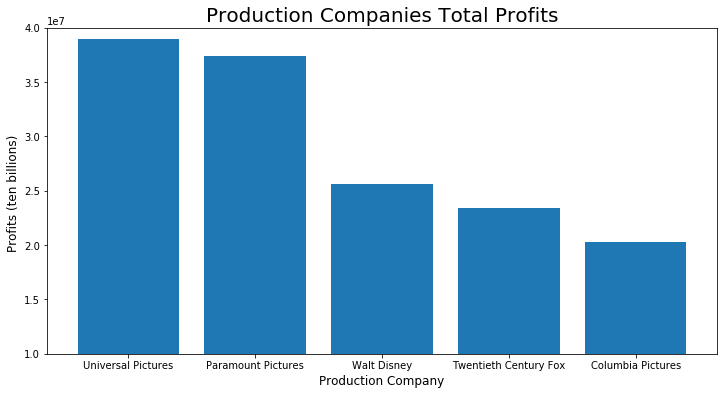

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(['Universal Pictures', 'Paramount Pictures', 'Walt Disney',
       'Twentieth Century Fox', 'Columbia Pictures'], pc_profits)
plt.ylim(1e07,4e07)
plt.title("Production Companies Total Profits",fontsize=20)
plt.xlabel("Production Company",fontsize=12)
plt.ylabel("Profits (ten billions) ",fontsize=12);

Another measure of a companies success is the average vote it gets from users. we will use a bar chart to check the companies that have the highest vote average then compare it to the companies with the highest profit in the conclusion.

Before evaluating the vote average for the dataset, the production companies who produced lower than 20 movies
are excluded from the dataset using the below function. Those movies are excluded because their sample is too small which makes their values not comparable to other production companies of many multiple movies

In [23]:
dfm2 = dfm.groupby("lead_production_company").filter(lambda x: len(x) > 20)
dfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 1 to 10857
Data columns (total 19 columns):
id                         4024 non-null int64
popularity                 4024 non-null float64
budget                     4024 non-null float64
revenue                    4024 non-null float64
original_title             4024 non-null object
cast                       4016 non-null object
director                   4023 non-null object
runtime                    4024 non-null int64
genres                     4024 non-null object
production_companies       4024 non-null object
release_date               4024 non-null datetime64[ns]
vote_count                 4024 non-null int64
vote_average               4024 non-null float64
release_year               4024 non-null int64
budget_adj                 4024 non-null float64
revenue_adj                4024 non-null float64
profit_adj                 4024 non-null float64
main_genre                 4024 non-null object
lead_production_c

Now presenting the companies with the highest popularity

In [24]:
b= dfm2.groupby('lead_production_company')['vote_average'].mean()
pc_vote= b.nlargest(5)
pc_vote

lead_production_company
Pixar Animation Studios   7.003333
Marvel Studios            6.766667
DC Comics                 6.695455
Lucasfilm                 6.623810
Channel Four Films        6.522727
Name: vote_average, dtype: float64

## And finally plotting the results:

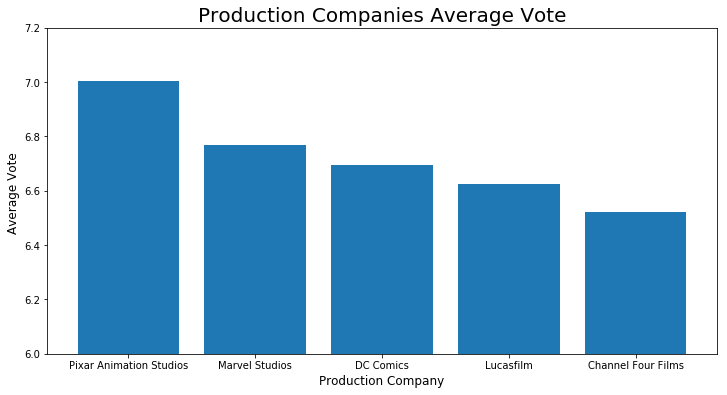

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(pc_vote.index, pc_vote)
plt.ylim(6,7.2)
plt.title("Production Companies Average Vote",fontsize=20)
plt.xlabel("Production Company",fontsize=12)
plt.ylabel("Average Vote ",fontsize=12);

### How did movie genres change over time?
#### in this question we will see a line chart that shows how number of movies for each genre changed from year to year

First we will use groupby to Identify the four highest genres in terms of number of movies, those are the ones we are gonna use in our chart

In [26]:
dfm.groupby('main_genre')['id'].size().nlargest(4)

main_genre
Drama     2228
Comedy    2087
Action    1481
Horror     853
Name: id, dtype: int64

Now we will create a series that holds the number of movies each genre had in each year

In [27]:
genres_count = dfm.groupby(['main_genre','release_year'])['id'].size()
genres_count.head()

main_genre  release_year
Action      1960            8
            1961            3
            1962            4
            1963            3
            1964            2
Name: id, dtype: int64

Since we are going to use a query later, we will turn the above series in to a dataframe using the below function

In [28]:
dfg=genres_count.to_frame()
dfg.head()

id
main_genre release_year    
Action     1960           8
           1961           3
           1962           4
           1963           3
           1964           2

Now filtring the genres and stoing into new dataframes after unstacking. unstacking of level 0 is done to change the mutlindex into a single index (release_year) that will be used as x axis for the line chart

In [29]:
y1 = dfg.query('main_genre == "Drama"').unstack(level=0)
y2 = dfg.query('main_genre == "Comedy"').unstack(level=0)
y3 = dfg.query('main_genre == "Action"').unstack(level=0)
y4 = dfg.query('main_genre == "Horror"').unstack(level=0)
y1.head()

,id
main_genre,Drama
release_year,
1960,5
1961,7
1962,10
1963,7
1964,10


Before plotting our data, we define a function that we will later use to plot individual lines

In [34]:
def line_plot(y,v_color,v_label):
    return plt.plot( y.index, y, marker='', color=v_color, linewidth=2, label= v_label )

In [ ]:
Finally plotting our data. 

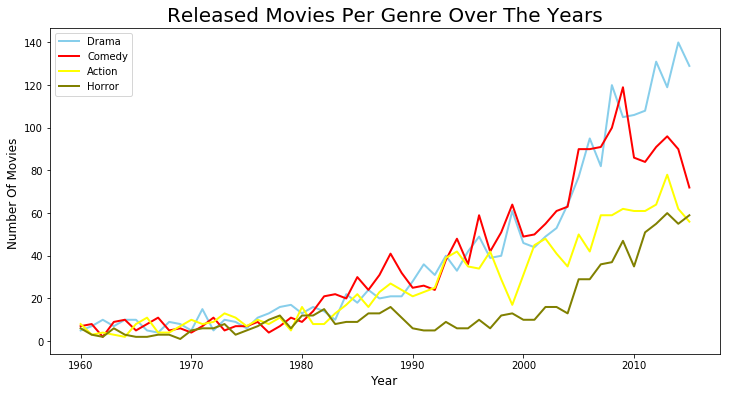

In [37]:
plt.figure(figsize=(12, 6))
# Calling the above defined function
line_plot(y1,"skyblue","Drama")
line_plot(y2,"red","Comedy")
line_plot(y3,"yellow","Action")
line_plot(y4,"olive","Horror")
plt.title("Released Movies Per Genre Over The Years",fontsize=20)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number Of Movies ",fontsize=12);
plt.legend();


<a id='conclusions'></a>
## Conclusions



For the first questions that we asked, which is to assess the most successful production companies based on different success criteria. We can see that the five most successful companies in terms of monetary success (net profit) are different than the successful companies in terms of  average user vote. 
This can be attributed to the fact that commercial blockbuster movies tend to generate a lot of money for production companies but do not get a good user average rating; this is why the chart that shows the most profitable companies is filled with big names that produce a lot of commercial movies. 

We should note that big production companies such as Universal and Paramount have multiple subsidiaries under other names such as Paramount classics and Columbia Tristar which means that the overall profit for the parent company is much larger than what is shown in the bar chart.
Finally, we can see that among the production companies who made the top list based on average votes are companies who make superheors movies such as DC and Marvel which could indicate that viewers aperciate this movie genre/type.
 

As for the second question, there are multiple points that could be made about the evolution of genres which can be summed up in the following:
-  All movies started with around the same count in the 60s going in the range of five to twenty movie per year. 
-  This continued up until the start of the 80s where Comedy movies started taking the lead with all other main genres competing for the second.
-  Horror movies had a sharp decline in the beginning of the 80s and after that it remained in the same range of its 60s production (5 – 20) until it peaked again in the 2000s
-  There is a noticeable 50% drop in number of Action movies per year in the late 90s
-  Another important decline is the number of Drama movies just before 2010 where it shows around 30% decline in number of movies per year
-  The number of Comedy movies have grown rapidly since the beginning of the new century, which made its lead over other genres easily visible in the charts 

As for the limitations of this dataset, there are several that we could address:

-  The dataset is taken from IMDB website without specifying which criteria a movie should fulfil to be part of this dataset which means that we can not tell for sure if this dataset is representative of the whole movie industry or not
-  Of the 10866 movies present in the dataset, 1030 movie don’t have null values for production companies; that is around 10% missing values which could affect the quality of the analysis if we are interested in investigating the production company variable.
-  Some of the variables like “Popularity” is not defined in the original document from Kaggle which limits the ability to use it in the analysis
